# Importowanie plików 

In [1]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import sklearn
print(sklearn.__version__)

1.6.0


In [3]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

In [4]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle: path = Path('../input/drowsiness-databaase')
else: path = Path(r'E:\Szkoła i Studia\Mechatronika\Semestr 7\Praca dyplomowa\Dataset\tabular_database\excel_files')
    
df = pd.read_excel(path/'training_data.xlsx')
overall_val_df = pd.read_excel(path/'validating_data.xlsx')
overall_tst_df = pd.read_excel(path/'training_data.xlsx')

modes = df.mode().iloc[0]

# Przygotowywanie danych

In [1]:
def proc_data(df):
    df['Yawning'] = pd.Categorical(df.Yawning)
    df['Drowsy'] = pd.Categorical(df.Drowsy)
    df = df.drop(columns = ["Column1", "Image"])
    # df = df.drop(columns = ["Yawning"])
    df = df.rename(columns={"Drowsy": "Is_drowsy"})
    return df

df = proc_data(df)
overall_val_df = proc_data(overall_val_df)
overall_tst_df = proc_data(overall_tst_df)

NameError: name 'df' is not defined

In [6]:
print(df)

           MAR       Roll     Pitch       EAR   Is_drowsy
0     0.626845  18.396028 -8.080665  0.259562      Drowsy
1     0.625194  -5.956032  1.744036  0.228701      Drowsy
2     0.616541 -84.218631  0.277656  0.276369      Drowsy
3     0.591161 -60.652150 -1.417466  0.287134      Drowsy
4     0.577353 -84.725102  1.373783  0.163893      Drowsy
...        ...        ...       ...       ...         ...
2216  0.000000   0.000000  0.000000  0.000000  Not_drowsy
2217  0.000000   0.000000  0.000000  0.000000  Not_drowsy
2218  0.000000   0.000000  0.000000  0.000000  Not_drowsy
2219  0.000000   0.000000  0.000000  0.000000  Not_drowsy
2220  0.000000   0.000000  0.000000  0.000000  Not_drowsy

[2221 rows x 5 columns]


In [7]:
continuous = ['MAR', 'EAR', 'Roll', 'Pitch']
dependand = 'Is_drowsy'

# Tworzenie podziału na dane treningowe i walidacyjne

In [8]:
from numpy import random
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size = 0.2)

In [9]:
def xs_y(df):
    xs = df[continuous].copy()
    return xs, df[dependand] if dependand in df else None

train_xs, train_y = xs_y(train_df)
val_xs, val_y = xs_y(val_df)

print(train_xs)
print(val_y)

           MAR       EAR       Roll      Pitch
1531  0.198758  0.166936  54.787255   8.892342
1264  0.231088  0.073486  69.338928   2.852765
1003  0.242828  0.058973  37.039760   1.879178
307   0.316349  0.291729  82.213678   0.797730
1963  0.158789  0.219323  12.521525  -5.426515
...        ...       ...        ...        ...
843   0.248750  0.033805  49.717160   1.946913
7     0.542793  0.309745 -48.710861  -7.447343
1091  0.239456  0.052550  31.750692   3.891439
591   0.265013  0.179182  12.259286 -22.797336
276   0.324633  0.279482  48.243352   2.634174

[1776 rows x 4 columns]
1596    Not_drowsy
1197        Drowsy
1083        Drowsy
1439    Not_drowsy
1123        Drowsy
           ...    
76          Drowsy
986     Not_drowsy
1888        Drowsy
1771    Not_drowsy
71          Drowsy
Name: Is_drowsy, Length: 445, dtype: category
Categories (2, object): ['Drowsy', 'Not_drowsy']


# Tworzenie drzew decyzyjnych - Pierwsza iteracja

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [11]:
import graphviz

def draw_tree(model, df, size = 10, ratio = 0.6, precision=2, **kwargs):
    s = export_graphviz(model, out_file=None, feature_names=df.columns, filled=True, 
                        rounded=True, special_characters= True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

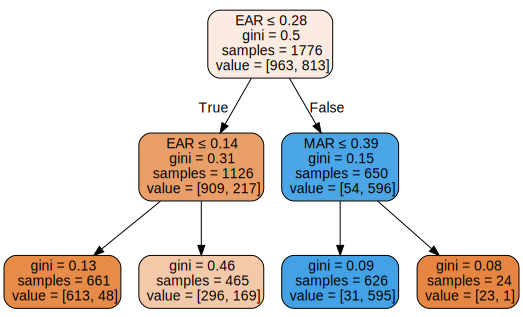

In [12]:
model = DecisionTreeClassifier(max_leaf_nodes=4)
model.fit(train_xs, train_y)
draw_tree(model, train_xs, size=10)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_y, model.predict(val_xs))
print("Accuracy:", accuracy)

Accuracy: 0.851685393258427


In [14]:
from sklearn.metrics import classification_report
report = classification_report(val_y, model.predict(val_xs))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Drowsy       0.80      0.95      0.87       235
  Not_drowsy       0.93      0.74      0.82       210

    accuracy                           0.85       445
   macro avg       0.87      0.85      0.85       445
weighted avg       0.86      0.85      0.85       445



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_y, model.predict(val_xs))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[224  11]
 [ 55 155]]


# Tworzenie drzew decyzyjnych - Druga iteracja

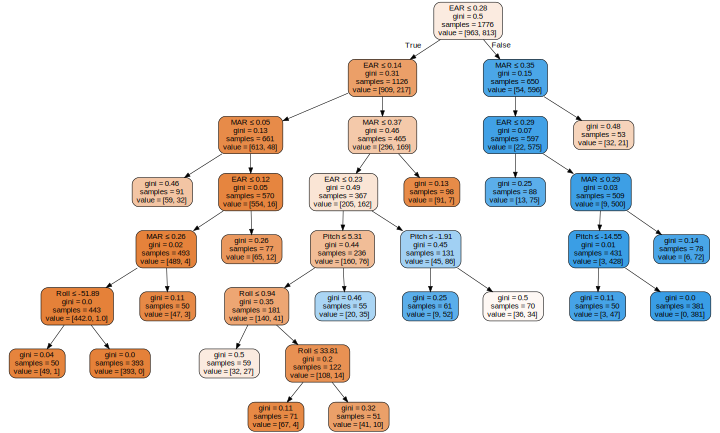

In [16]:
model = DecisionTreeClassifier(min_samples_leaf=50)
model.fit(train_xs, train_y)
draw_tree(model, train_xs, size=10)

In [17]:
accuracy = accuracy_score(val_y, model.predict(val_xs))
print("Accuracy:", accuracy)

Accuracy: 0.8898876404494382


In [18]:
report = classification_report(val_y, model.predict(val_xs))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Drowsy       0.87      0.93      0.90       235
  Not_drowsy       0.91      0.85      0.88       210

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445



In [19]:
cm = confusion_matrix(val_y, model.predict(val_xs))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[218  17]
 [ 32 178]]


# Tworzenie losowych lasów decyzyjnych - Pierwsza iteracja

In [20]:
def get_tree(proportion = 0.6):
    train_dataset_len = len(train_y)
    indexes = random.choice(train_dataset_len, int(train_dataset_len*proportion))
    random_tree = DecisionTreeClassifier(min_samples_leaf=6)
    random_tree.fit(train_xs.iloc[indexes], train_y.iloc[indexes])
    return random_tree

In [21]:
forest = [get_tree() for i in range(100)]

In [22]:
def find_most_common(array):
    count = 0
    for prediction in array:
        if prediction == "Drowsy":
            count += 1
    if count > len(array)/2:
        return "Drowsy"
    else:
        return "Not_drowsy"

In [23]:
all_forest_classifications = [tree.predict(val_xs) for tree in forest]
all_forest_classifications = np.stack(all_forest_classifications)
all_forest_classifications = np.transpose(all_forest_classifications)
average_classification = [find_most_common(forest_classification) for forest_classification in all_forest_classifications]
average_classification = np.array(average_classification)

In [24]:
accuracy = accuracy_score(val_y, average_classification)
print("Accuracy:", accuracy)

Accuracy: 0.9168539325842696


In [25]:
report = classification_report(val_y, average_classification)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Drowsy       0.92      0.93      0.92       235
  Not_drowsy       0.92      0.90      0.91       210

    accuracy                           0.92       445
   macro avg       0.92      0.92      0.92       445
weighted avg       0.92      0.92      0.92       445



In [26]:
cm = confusion_matrix(val_y, average_classification)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[218  17]
 [ 20 190]]


# Tworzenie losowych lasów decyzyjnych - Druga iteracja

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, min_samples_leaf=25)
rf.fit(train_xs, train_y);

In [28]:
accuracy = accuracy_score(val_y, rf.predict(val_xs))
print("Accuracy:", accuracy)

Accuracy: 0.9146067415730337


In [29]:
report = classification_report(val_y, rf.predict(val_xs))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Drowsy       0.91      0.94      0.92       235
  Not_drowsy       0.93      0.89      0.91       210

    accuracy                           0.91       445
   macro avg       0.92      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



In [30]:
cm = confusion_matrix(val_y, rf.predict(val_xs))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[220  15]
 [ 23 187]]


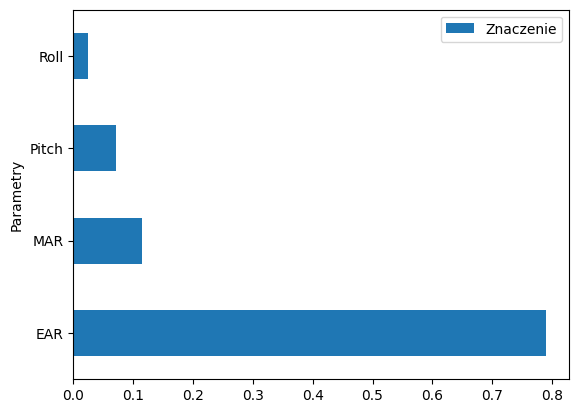

In [31]:
importance = pd.DataFrame(dict(Parametry=train_xs.columns, Znaczenie=rf.feature_importances_)).sort_values("Znaczenie", ascending = False)
importance.plot('Parametry', 'Znaczenie', 'barh');

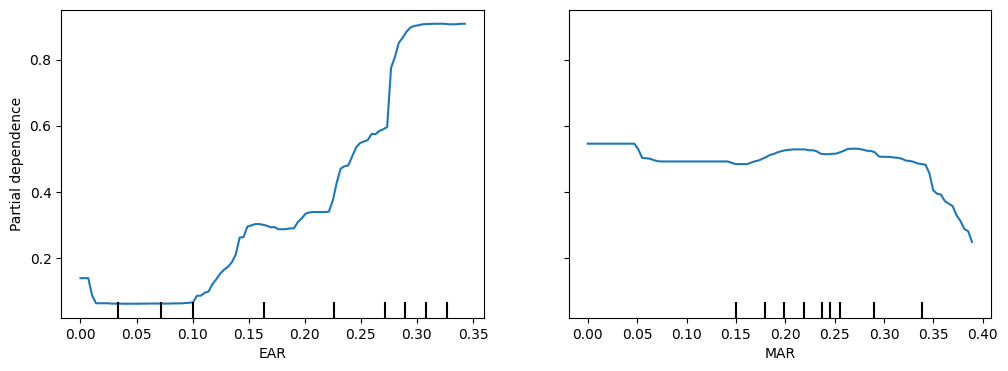

In [32]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    rf,            
    val_xs,        
    ['EAR', 'MAR'],
    ax=ax          
)
plt.show()

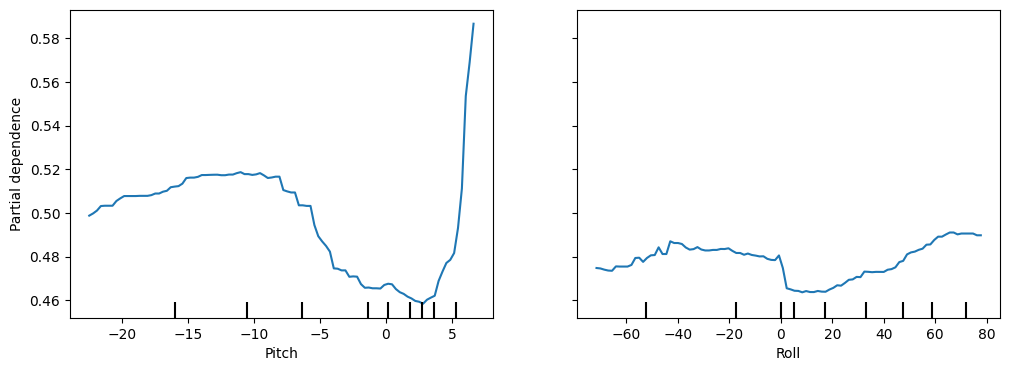

In [33]:
fig2, ax2 = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    rf,            
    val_xs,        
    ['Pitch', 'Roll'],
    ax=ax2          
)

# Display the plot
plt.show()


# Tworzenie konwolucyjnej sieci neuronowej - Pierwsza iteracja

In [34]:
from fastai.tabular.all import *
train_xs, train_y = xs_y(train_df)
val_xs, val_y = xs_y(val_df)

In [35]:
dls = TabularDataLoaders.from_df(train_df, y_names="Is_drowsy", y_block = CategoryBlock,
    cont_names = ['EAR', 'MAR', 'Pitch', 'Roll'],
    procs = [Categorify, FillMissing, Normalize])

splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [36]:
learn = tabular_learner(dls, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.001737800776027143)

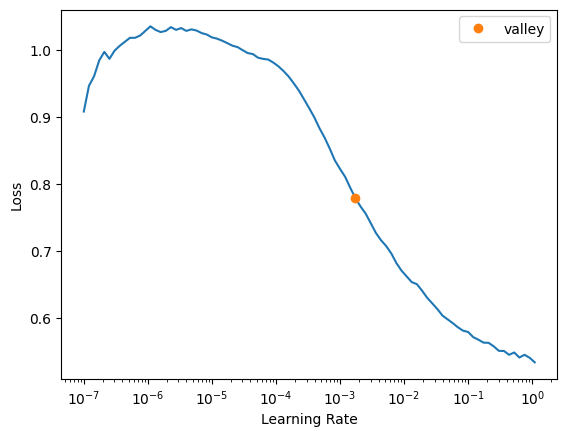

In [37]:
learn.lr_find()

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.561715,0.340538,0.890141,00:00
1,0.379021,0.250471,0.898592,00:00
2,0.328034,0.233757,0.907042,00:00
3,0.289114,0.236899,0.901408,00:00


In [39]:
learn.show_results()

,EAR,MAR,Pitch,Roll,Is_drowsy,Is_drowsy_pred
0,0.613784,1.700675,0.521407,-1.596070,0.0,0.0
1,1.236519,-1.109675,0.758103,0.196921,1.0,1.0
2,0.959442,0.100378,0.713462,0.472034,1.0,1.0
3,0.899464,0.421918,0.721829,0.572917,1.0,1.0
4,0.661566,1.621505,0.597708,-1.907819,0.0,0.0
5,-0.023833,0.453158,-1.260558,0.544290,1.0,0.0
6,-0.390762,0.195421,0.257745,-2.300053,0.0,0.0
7,-1.292538,0.085203,0.400071,1.181972,0.0,0.0
8,-0.164577,-1.282821,-3.848285,-0.280954,0.0,0.0


# Zapisanie modeli

In [40]:
%cd /kaggle/working

/kaggle/working


In [41]:
import pickle

with open('random_forest_drowsiness_model.pkl', 'wb') as fid:
    pickle.dump(rf, fid)

learn.export('nn_drowsiness_model.pkl')